In [2]:
import torch
import numpy as np
import pandas as pd 
import random
import os
from IPython.display import Image,display
from PIL import Image as PIL_Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [3]:
filenames = os.listdir("../data/dogs-vs-cats/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'category': categories,
    'filename': filenames,
})

In [4]:
df.head()

,category,filename
0,1,dog.12247.jpg
1,1,dog.6502.jpg
2,0,cat.2676.jpg
3,0,cat.6198.jpg
4,1,dog.8038.jpg


In [5]:
df.tail()

,category,filename
24995,0,cat.977.jpg
24996,1,dog.5905.jpg
24997,1,dog.933.jpg
24998,0,cat.385.jpg
24999,1,dog.10684.jpg


In [6]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

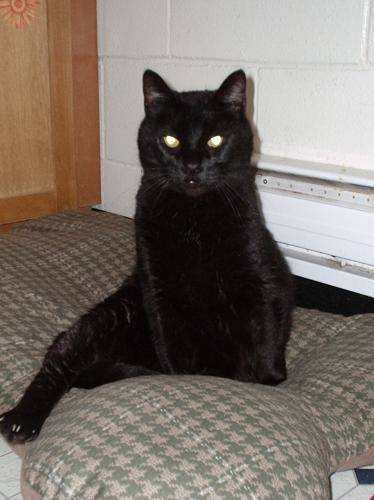

In [7]:
filename = random.choice(filenames)
image = Image("../data/dogs-vs-cats/train/" + filename)
display(image)

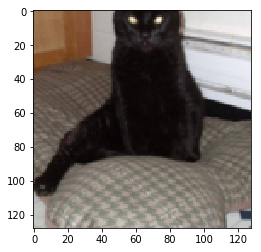

In [8]:
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ColorJitter(),
    transforms.RandomCrop(256),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(128),
    transforms.ToTensor()
])

img = PIL_Image.open("../data/dogs-vs-cats/train/" + filename)
img = data_transform(img)
img
plt.imshow(img.permute(1, 2, 0))

In [9]:
class DogsVsCatsNet(torch.nn.Module):
    def __init__(self):
        super(DogsVsCatsNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(100 * 100, 4096)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(4096, 2) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
dogs_vs_cats_net = DogsVsCatsNet()

In [10]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(dogs_vs_cats_net.parameters(), lr=1.0e-3)

In [11]:
batch_size = 100
epochs = 1000
steps = 0

for epoch in range(epochs):
    pass